In [395]:
# import plotly.plotly as py
# from plotly.grid_objs import Grid, Column
# from plotly.tools import FigureFactory as FF 

import pandas as pd
import time
import re
import numpy as np

In [396]:
refugee_df = pd.read_csv('unhcr-persons-of-concern-origin-syr-csv-1.csv')
refugee_df = refugee_df.sort_values('Year', ascending=True)
refugee_df = refugee_df.reset_index()
refugee_df = refugee_df.drop(refugee_df.index[0])
refugee_df = refugee_df.drop(['index'], axis=1)
refugee_df

,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Returned refugees,Internally displaced persons (IDPs),Returned IDPs,Stateless persons,Others of concern,Total Population
1,1968,Lebanon,Syrian Arab Rep.,1200,NaN,NaN,NaN,NaN,NaN,NaN,1200
2,1969,Lebanon,Syrian Arab Rep.,1200,NaN,NaN,NaN,NaN,NaN,NaN,1200
3,1979,Lebanon,Syrian Arab Rep.,500,NaN,NaN,NaN,NaN,NaN,NaN,500
4,1980,Italy,Syrian Arab Rep.,2,NaN,NaN,NaN,NaN,NaN,NaN,2
5,1980,Lebanon,Syrian Arab Rep.,500,NaN,NaN,NaN,NaN,NaN,NaN,500
6,1981,Italy,Syrian Arab Rep.,4,NaN,NaN,NaN,NaN,NaN,NaN,4
7,1981,Lebanon,Syrian Arab Rep.,500,NaN,NaN,NaN,NaN,NaN,NaN,500
8,1982,Italy,Syrian Arab Rep.,4,NaN,NaN,NaN,NaN,NaN,NaN,4
9,1982,Lebanon,Syrian Arab Rep.,500,NaN,6000,NaN,NaN,NaN,NaN,6500
10,1983,Lebanon,Syrian Arab Rep.,520,NaN,NaN,NaN,NaN,NaN,NaN,520


In [397]:
# select the years we want
years = ['2011', '2012', '2013', '2014', '2015','2016', '2017']

refugee_subset = refugee_df[refugee_df['Year'].isin(years)]
# reset index
refugee_subset = refugee_subset.reset_index()
# drop index column
bad_cols = ['index','Origin','Returned refugees','Returned refugees',
            'Internally displaced persons (IDPs)','Returned IDPs',
            'Stateless persons','Others of concern']
refugee_subset = refugee_subset.drop(bad_cols, axis=1)
#refugee_subset

In [398]:
refugee_subset.to_csv('clean_refugee_data.csv',index=False, header=True)

In [399]:
# displays list of unique country names in the data frame
# refugee_df['Country / territory of asylum/residence'].unique()

## Replace following Country Names

Venezuela (Bolivarian Republic of) -> Venezuela
Czech Rep. -> Czech Republic
Iran (Islamic Rep. of) -> Iran
The former Yugoslav Republic of Macedonia -> Macedonia
Bolivia (Plurinational State of) -> Bolivia
Dominican Rep. -> Dominican Republic
Rep. of Korea -> "Korea, South"
United Rep. of Tanzania -> Tanzania
China, Hong Kong SAR -> Hong Kong
South Sudan -> Sudan
Dem. Rep. of the Congo -> "Congo, Democratic Republic of the"
Central African Rep. -> Central African Republic
United States of America -> United States
Sint Maarten (Dutch part) -> Sint Maarten
Serbia and Kosovo (S/RES/1244 (1999)) -> Serbia
Rep. of Moldova -> Moldova
Syrian Arab Rep. -> Syria

In [400]:
# Grab country codes in order to use it with Plotly
countries_df = pd.read_csv('plotly_countries_and_codes.csv')
#countries_df

In [401]:
# Import csv with lat/long of each country
locations_df = pd.read_csv('countries.csv')
# locations_df

In [402]:
# replace names in refugee_subse dataframe
new_refugee_df = refugee_subset.replace({
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    'Czech Rep.':'Czech Republic',
    'Iran (Islamic Rep. of)':'Iran',
    'The former Yugoslav Republic of Macedonia':'Macedonia',
    'Bolivia (Plurinational State of)':'Bolivia',
    'Dominican Rep.':'Dominican Republic',
    'Rep. of Korea': 'Korea, South',
    'United Rep. of Tanzania':'Tanzania',
    'China, Hong Kong SAR':'Hong Kong',
    'South Sudan':'Sudan',
    'Dem. Rep. of the Congo':'Congo, Democratic Republic of the',
    'Central African Rep.':'Central African Republic',
    'United States of America':'United States',
    'Sint Maarten (Dutch part)':'Sint Maarten',
    'Serbia and Kosovo (S/RES/1244 (1999))':'Serbia',
    'Rep. of Moldova':'Moldova',
    'Syrian Arab Rep.':'Syria',   
})
#new_refugee_df

In [403]:
# joining the two tables together
merged_df = new_refugee_df.set_index('Country / territory of asylum/residence').join(countries_df.set_index('COUNTRY'))

# reset row index
merged_df = merged_df.reset_index()

# remove GDP column
merged_df = merged_df.drop(['GDP (BILLIONS)'], axis=1)

# rename index column to 'Country'
merged_df.rename(columns={'index':'Country'}, inplace=True)

# rearrange columns
merged_df = merged_df[['CODE','Country','Year',
                       'Refugees (incl. refugee-like situations)',
                       'Asylum-seekers (pending cases)',
                       'Total Population']]

## Clean * and NaN values

In [405]:
refugee_subset = refugee_df[refugee_df['Year'].isin(years)]
# Fill NaN values with 0
merged_df['Refugees (incl. refugee-like situations)'] = merged_df['Refugees (incl. refugee-like situations)'].fillna(0)
# remove * and convert values to int values
merged_df['Refugees (incl. refugee-like situations)'] = merged_df['Refugees (incl. refugee-like situations)'].apply(lambda x : 0 if x == '*' else int(x))

In [406]:
# Fill NaN values with 0
merged_df['Asylum-seekers (pending cases)'] = merged_df['Asylum-seekers (pending cases)'].fillna(0)
# remove * and convert values to int values
merged_df['Asylum-seekers (pending cases)'] = merged_df['Asylum-seekers (pending cases)'].apply(lambda x : 0 if x == '*' else int(x))

In [407]:
# Fill NaN values with 0
merged_df['Total Population'] = merged_df['Total Population'].fillna(0)
# remove * and convert values to int values
merged_df['Total Population'] = merged_df['Total Population'].apply(lambda x : 0 if x == '*' else int(x))
# merged_df


## Plotly

In [408]:
import plotly
import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go
plotly.__version__

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

plotly.tools.set_credentials_file(username='hwu43', api_key='8d3oItgJtnwYVfSQR7nL')

In [409]:
# find the total, just for reference/filler; not to be used in the final visualization
new_total_df = merged_df.groupby(['Country', 'CODE']).sum()
new_total_df = new_total_df.reset_index()
new_total_df

,Country,CODE,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Total Population
0,Afghanistan,AFG,1,0,1
1,Albania,ALB,9,30,42
2,Algeria,DZA,8,21469,21477
3,Anguilla,AIA,2,0,2
4,Antigua and Barbuda,ATG,19,0,19
5,Argentina,ARG,1435,278,2242
6,Armenia,ARM,72143,437,78080
7,Australia,AUS,2011,852,2863
8,Austria,AUT,101719,40001,141720
9,Azerbaijan,AZE,58,35,97


In [411]:
# remove rows where refugees == 0
new_total_df = new_total_df[new_total_df['Refugees (incl. refugee-like situations)'] != 0]

In [412]:
# # rename Korea, South to South Korea
# name_change = {
#     'Korea, South': 'South Korea',
#     'Congo, Democratic Republic of the': 'Congo [DRC]',
#     'Macedonia': 'Macedonia [FYROM]'   
# }

# # renames the provinces using name_change
# all_code_df.replace(name_change, inplace=True)
# all_code_df
# # all_code_df['latitude'].unique()
# # all_code_df.to_csv('clean_refugee_data.csv',index=False, header=True)

In [413]:
# Add longitude and latitude values
all_code_df = new_total_df.set_index('Country').join(locations_df.set_index('name'))
all_code_df = all_code_df.reset_index()
all_code_df = all_code_df.drop(['country'], axis=1)
all_code_df.to_csv('clean_refugee_data.csv',index=False, header=True)


In [415]:
# # add coordinates for South Korea 
all_code_df.at[71, 'latitude'] = 35.9078
all_code_df.at[71, 'longitude'] = 127.7669

# Macdeonia
all_code_df.at[81, 'latitude'] = 41.6086
all_code_df.at[81, 'longitude'] = 21.7453

# Sint Maarten
all_code_df.at[114,'latitude'] = 18.0347
all_code_df.at[114,'longitude'] = -63.0681

# Congo
all_code_df.at[31,'latitude'] = -4.038333
all_code_df.at[31,'longitude'] = 21.758664
all_code_df.to_csv('clean_refugee_data.csv',index=False, header=True)
all_code_df

,Country,CODE,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Total Population,latitude,longitude
0,Afghanistan,AFG,1,0,1,33.939110,67.709953
1,Albania,ALB,9,30,42,41.153332,20.168331
2,Algeria,DZA,8,21469,21477,28.033886,1.659626
3,Anguilla,AIA,2,0,2,18.220554,-63.068615
4,Antigua and Barbuda,ATG,19,0,19,17.060816,-61.796428
5,Argentina,ARG,1435,278,2242,-38.416097,-63.616672
6,Armenia,ARM,72143,437,78080,40.069099,45.038189
7,Australia,AUS,2011,852,2863,-25.274398,133.775136
8,Austria,AUT,101719,40001,141720,47.516231,14.550072
9,Azerbaijan,AZE,58,35,97,40.143105,47.576927


In [416]:
# was experimenting with removing the "trace 0" when hovering over countries
# removes rows where Country column has nan
dropped_nan_df = all_code_df[pd.notnull(all_code_df['Country'])]
# dropped_nan_df

In [417]:
top_refugee = all_code_df.sort_values('Refugees (incl. refugee-like situations)', ascending=False)
top_refugee = top_refugee.reset_index()
top_refugee = top_refugee.drop(['index'], axis=1)
# rearrange columns
top_refugee = top_refugee[['Country','Refugees (incl. refugee-like situations)',
                           'Asylum-seekers (pending cases)', 'Total Population']]
top_refugee

,Country,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Total Population
0,Turkey,11143758,1405,11363762
1,Lebanon,5186161,1390,5201110
2,Jordan,3377497,3109,3380606
3,Iraq,1233449,4965,1238702
4,Germany,1077967,303798,1381765
5,Egypt,643221,85,643306
6,Sweden,312761,89957,402718
7,Austria,101719,40001,141720
8,Netherlands,90038,17158,107196
9,Armenia,72143,437,78080


In [428]:
# plot out the countries
data = [go.Choropleth(
    locations = all_code_df['CODE'],
    z = all_code_df['Refugees (incl. refugee-like situations)'],
    text = all_code_df['Country'],
#     colorscale = [
#         [0, "rgb(51, 0, 25)"],
#         [0.2, "rgb(102, 0, 51)"],
#         [0.5, "rgb(153, 0, 76)"],
#         [0.6, "rgb(204, 0, 102)"],
#         [0.7, "rgb(255, 51, 153)"],
#         [1, "rgb(255, 153, 204)"]
#     ],
    
    colorscale = [
        [0, "rgb(229, 190, 212)"],
        [0.01, "rgb(219, 133, 182)"],
        [0.5, "rgb(142, 84, 117)"],
        [0.6, "rgb(107, 41, 75)"],
#         [0.7, "rgb(255, 51, 153)"],
        [1, "rgb(79, 21, 51)"]
#         [0, "rgb(229, 190, 212)"],
#         [0.1, "rgb(219, 133, 182)"],
#         [0.3, "rgb(142, 84, 117)"],
#         [0.5, "rgb(107, 41, 75)"],
# #         [0.7, "rgb(255, 51, 153)"],
#         [1, "rgb(79, 21, 51)"]
    ],
    
   
    zmin = 0,
    zmax = 600000,
    autocolorscale = False,
    reversescale = False,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '',
        title = 'Number of Syrian Refugees'),
)]

# following code is for lines connecting countries
countries = [go.Scattergeo(
    lon = dropped_nan_df['longitude'],
    lat = dropped_nan_df['latitude'],
    hoverinfo = 'none',
#     text = dropped_nan_df['COUNTRY'],
    mode = 'none',
#     marker = go.scattergeo.Marker(
#         size = 0,
#         color = 'rgb(255, 0, 0)',
#         line = go.scattergeo.marker.Line(
#             width = 3,
#             color = 'rgba(68, 68, 68, 0)'
#         ))
    )]

refugee_paths = []

syria_start_lon = 38.996815
syria_start_lat = 34.802075
maximum_value = float(dropped_nan_df['Refugees (incl. refugee-like situations)'].max())

for i in range(len(dropped_nan_df)):
    # setting the opacity of the lines
    opacity = 0
    country_refugee = dropped_nan_df['Refugees (incl. refugee-like situations)'][i]
    opacity = float(country_refugee) / maximum_value
    # doing this because otherwise, the lines to countries besides Germany are invisible
    if opacity < 0.25:
        opacity = 0.25
        
    refugee_paths.append(
        go.Scattergeo(
            locationmode = 'country names',
            lon = [syria_start_lon, dropped_nan_df['longitude'][i]],
            lat = [syria_start_lat, dropped_nan_df['latitude'][i]],
            mode = 'lines',
            line = go.scattergeo.Line(
                width = 1,
                color = 'red',
            ),
            opacity = opacity,
        )
    )

layout = go.Layout(
    showlegend = False,
    title = go.layout.Title(
        text = '2011-2018 Syrian Refugee Migration Patterns'
    ),
    
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
#             type = 'azimuthal equal area'
            type = 'equirectangular',
        ),
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)', 
    ),
    
    annotations = [go.layout.Annotation(
        x = 0.55,
        y = 0.1,
        xref = 'paper',
        yref = 'paper',
        text = 'Source: <a href="http://popstats.unhcr.org/en/asylum_seekers_monthly">\
            Asylum-Seekers (Monthly Data)</a>',
        showarrow = False
    )]
)

fig = go.Figure(data = data + refugee_paths + countries, layout = layout)
py.iplot(fig, validate = False, filename = 'd3-world-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~hwu43/0 or inside your plot.ly account where it is named 'd3-world-map'


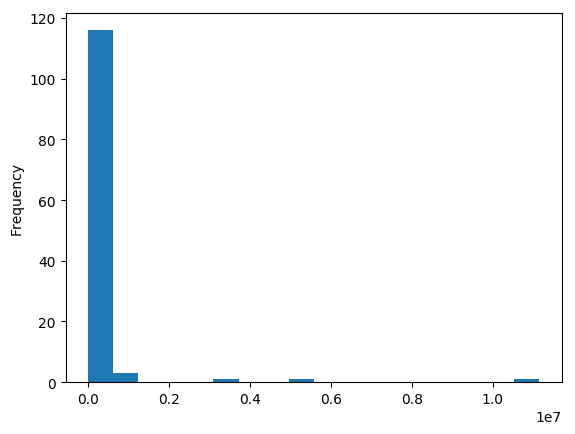

In [429]:
import seaborn as sb
from matplotlib import pyplot as plt

#sb.distplot(all_code_df['Refugees (incl. refugee-like situations)'], kde=False)

all_code_df['Refugees (incl. refugee-like situations)'].plot.hist(bins=18)
# plt.hist(all_code_df['Refugees (incl. refugee-like situations)'])

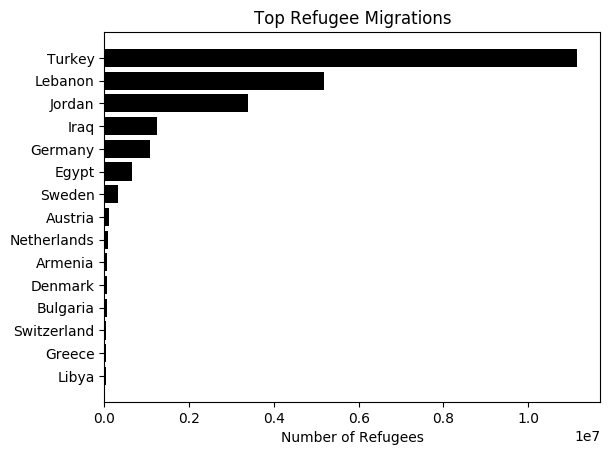

In [426]:
#https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barh.html

plt.rcdefaults()
fig, ax = plt.subplots()

# y_data will be the titles
y_data = []

# x_data is numbe rof weeks
top_refugee = top_refugee[:15]
x_data = top_refugee['Refugees (incl. refugee-like situations)']
y_data = top_refugee['Country']
# for index, row in max_data.iterrows():
#     # combine title with year
#     title_year = row['title'] + ' '+ '('+ row['year']+')'
#     y_data.append(title_year)

# plot data
ax.barh(y_data, x_data, color='k', align='center')

# label data
ax.set_yticks(y_data)
ax.set_yticklabels(y_data)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Refugees')
ax.set_title('Top Refugee Migrations')

plt.show()

In [427]:
top_refugee

,Country,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Total Population
0,Turkey,11143758,1405,11363762
1,Lebanon,5186161,1390,5201110
2,Jordan,3377497,3109,3380606
3,Iraq,1233449,4965,1238702
4,Germany,1077967,303798,1381765
5,Egypt,643221,85,643306
6,Sweden,312761,89957,402718
7,Austria,101719,40001,141720
8,Netherlands,90038,17158,107196
9,Armenia,72143,437,78080
